In [75]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

In [76]:
#same패딩 적용
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',padding='same')

In [77]:
#폴링 적용
keras.layers.MaxPooling2D(2)
#AveragePooling2D

In [78]:
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target,test_size=0.2, random_state=42)

In [79]:
model=keras.Sequential() 
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same', input_shape=(28,28,1)))

In [80]:
model.add(keras.layers.MaxPooling2D(2))

In [81]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [82]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

In [84]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5082 - accuracy: 0.8176 - val_loss: 0.3279 - val_accuracy: 0.8780
Epoch 2/20
  16/1500 [..............................] - ETA: 16s - loss: 0.3113 - accuracy: 0.8887

C:\Users\sd39a\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 17s 11ms/step - loss: 0.3358 - accuracy: 0.8792 - val_loss: 0.2676 - val_accuracy: 0.9017
Epoch 3/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2892 - accuracy: 0.8946 - val_loss: 0.2564 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2552 - accuracy: 0.9084 - val_loss: 0.2341 - val_accuracy: 0.9138
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2309 - accuracy: 0.9155 - val_loss: 0.2308 - val_accuracy: 0.9162
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2108 - accuracy: 0.9221 - val_loss: 0.2196 - val_accuracy: 0.9199
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1945 - accuracy: 0.9264 - val_loss: 0.2215 - val_accuracy: 0.9195
Epoch 8/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1783 - accuracy: 0.9330 - val_loss: 0.2153 - val_accura

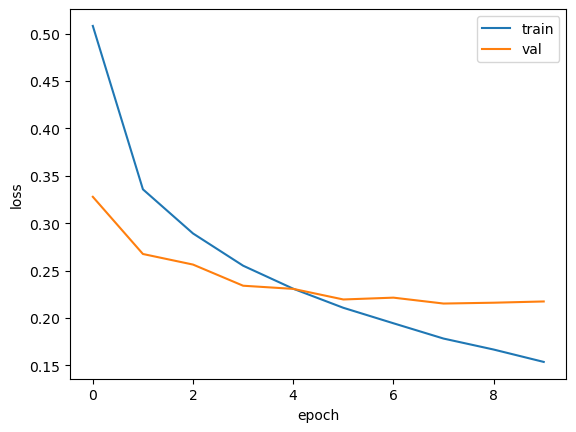

In [86]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.xlabel( 'epoch') 
plt.ylabel('loss') 
plt.legend ( ['train', 'val']) 
plt.show()

In [87]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9224


[0.21528570353984833, 0.9224166870117188]

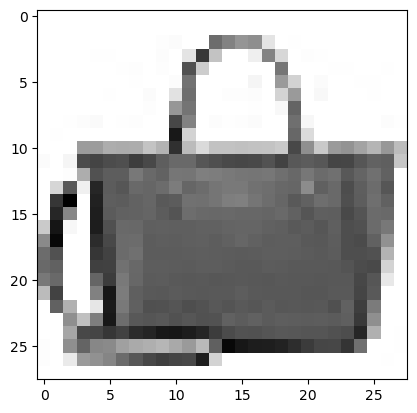

In [88]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [89]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 37ms/step
[[3.5203186e-17 2.4847171e-25 2.7698348e-22 4.7690493e-19 1.2234017e-19
  3.9014527e-19 6.2169386e-16 8.8493578e-20 1.0000000e+00 4.5230717e-19]]


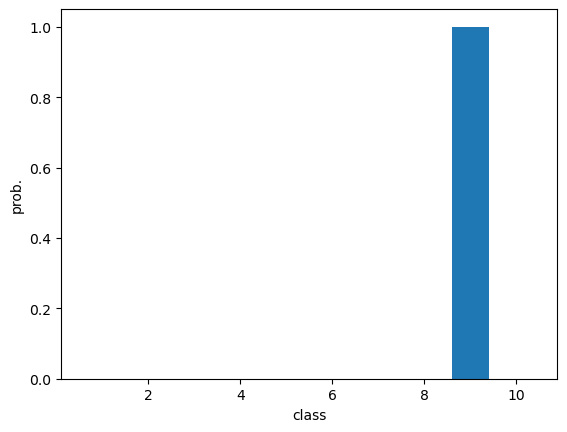

In [90]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [91]:
classes = ['티셔츠', '바지',' 스웨터', '드레스' ,'코트' ,'샌달','셔츠','스니커즈','가방','앵클 부츠'] 
import numpy as np
print(classes[np.argmax(preds)])

가방


In [92]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2437 - accuracy: 0.9154


[0.24370457231998444, 0.9154000282287598]

In [93]:
#가중치 시각화
model=keras.models.load_model('best-cnn-model.h5')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 29: invalid continuation byte

In [94]:
model.layers

In [95]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [96]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.029289292 0.26653767


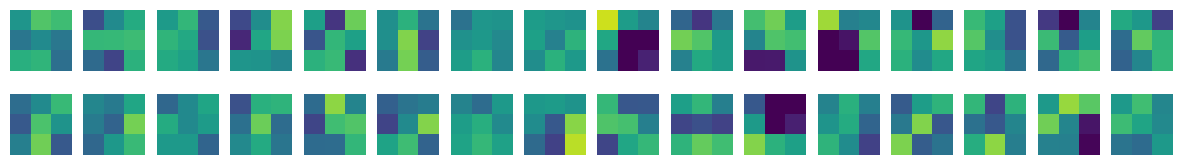

In [97]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [98]:
# 함수형 api
dense1=keras.layers.Dense(100,activation='sigmoid')
dense2=keras.layers.Dense(10, activation='softmax')


In [99]:
conv_acti=keras.Model(model.input, model.layers[0].output)

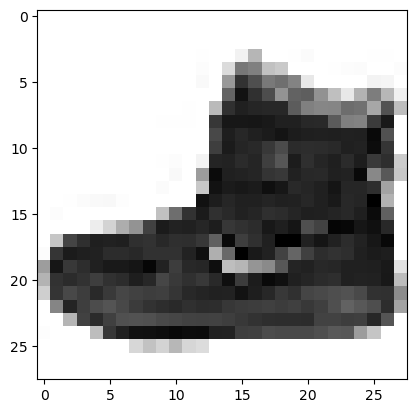

In [100]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [101]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 23ms/step


In [102]:
feature_maps.shape

(1, 28, 28, 32)

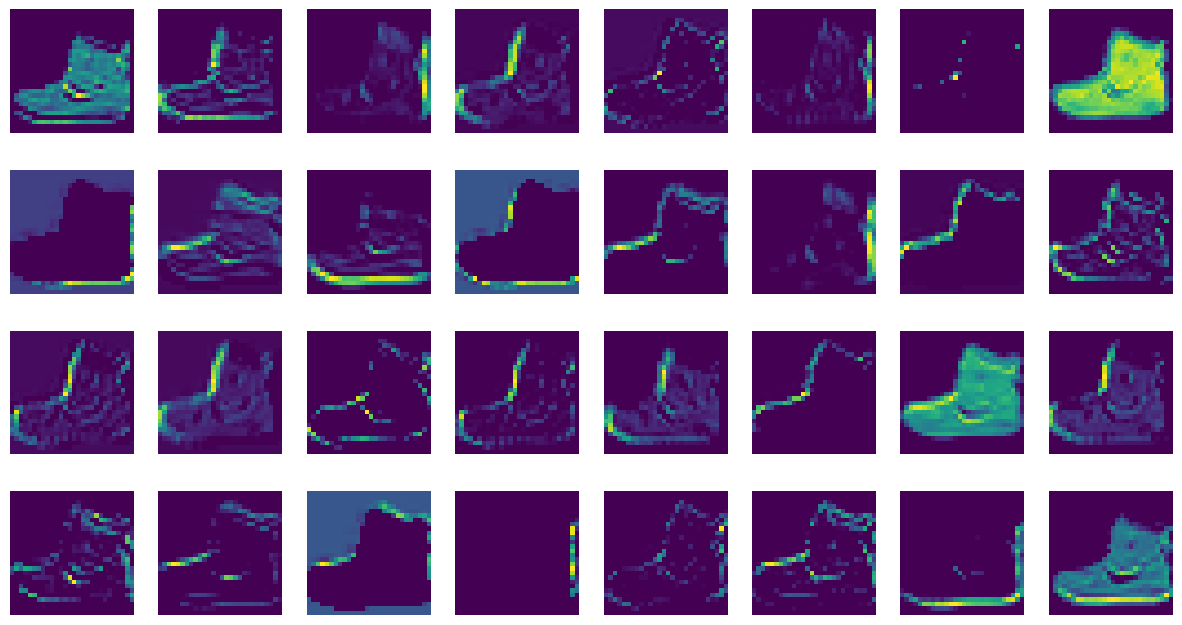

In [105]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [106]:
conv2_acti=keras.Model(model.input,model.layers[2].output)

In [107]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 27ms/step


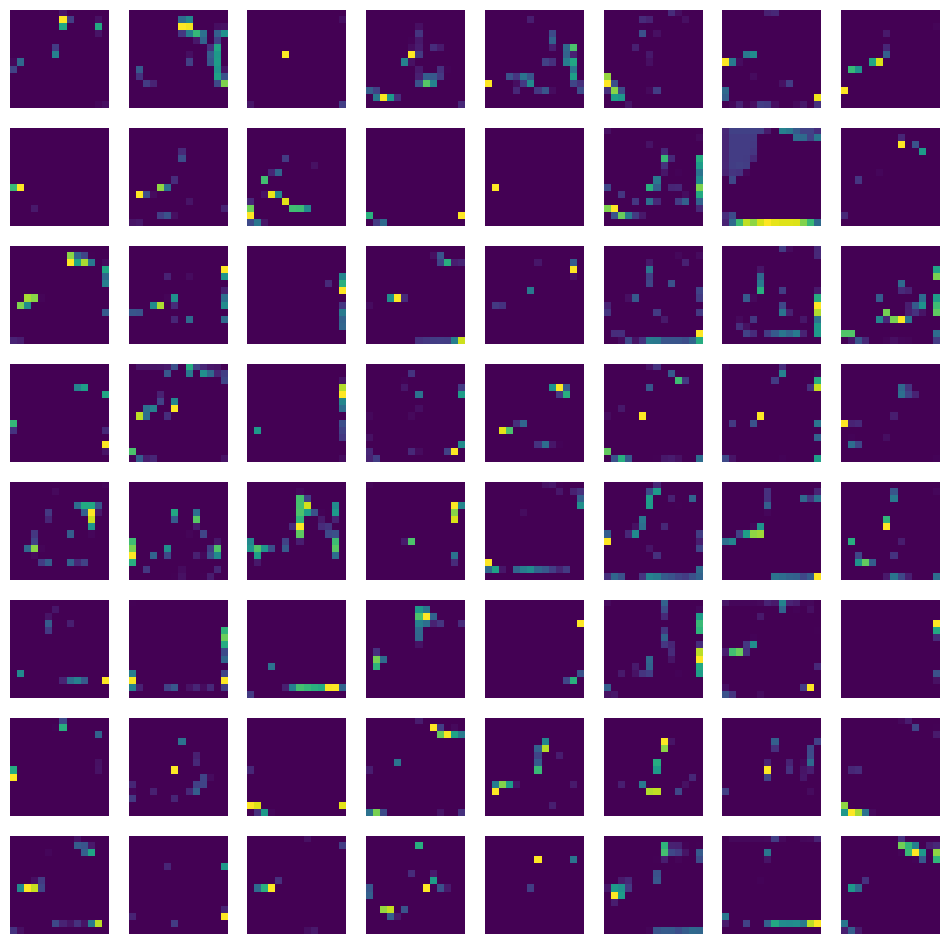

In [109]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()